# Отчет по проекту: Исследование рынка заведений общественного питания города Москвы

# Сроки проведения проекта: 29.08.2022 - 02.09.2022

# Цель проекта:
Привлечь инвесторов на проект открытия нового кафе с роботами-официантами в Москве.

# Задачи проекта:
1. Изучить открытые данные о заведениях общественного питания в Москве.
2. Дать рекомендации по:
 * виду заведения, 
 * количеству посадочных мест, 
 * а также району расположения.
3. Подготовить красочную и содержательную презентацию для инвесторов с результатами исследования.

# Исходные данные:
Файл данных `rest_data.csv`, со следующими полями:
* `id          —` идентификатор объекта;
* `object_name —` название объекта общественного питания (переименовано в `name`);
* `chain       —` сетевой ресторан;
* `object_type —` тип объекта общественного питания (переименовано в `type`);
* `address     —` адрес;
* `number      —` количество посадочных мест (переименовано в `seats`).

**Замечание**: сразу заметим, что такие данные не несут никакой информации по успеху заведения - так что не понятно, какого рода рекомендации можно дать на базе анализа таких данных.  Только считать их все успешными и искать особенности каждого параметра, выдовая их за причину успеха - что-то вроде вариации на тему о пользе/вреде соленых огурцов для безопасности полетов.

Недостатком этого набора данных является отсутствие малейшего бизнес-параметра оптимизации, по отношению к которому возможен поиск предпочтительных значений других параметров - и, как следствие, рекомендации инвесторам.  Поэтому отчет получится чисто по статистическим особенностям заведений питания в Москве - но инвесторам-то нужны ROI !

**Дисклеймер**: в реальной ситуации следовало бы сразу запросить поменять данные - с пояснением, что в предоставленных данных в принципе нет информации, способной заинтересовать инвесторов.  Нет смысла обманывать доверие людей - с такими данными нельзя идти к инвесторам и терять организованную встречу с ними.  Но у нас учебный проект на визуализацию, поэтому продолжим.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-№1.-Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Шаг-№1.-Загрузка-данных-и-подготовка-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг №1. Загрузка данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Импортирование-библиотек-Python" data-toc-modified-id="Импортирование-библиотек-Python-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортирование библиотек Python</a></span></li><li><span><a href="#Обзор-данных-и-предобработка-датасета" data-toc-modified-id="Обзор-данных-и-предобработка-датасета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обзор данных и предобработка датасета</a></span><ul class="toc-item"><li><span><a href="#Небольшие-улучшения-датасета" data-toc-modified-id="Небольшие-улучшения-датасета-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Небольшие улучшения датасета</a></span></li><li><span><a href="#Проверка-дупликатов" data-toc-modified-id="Проверка-дупликатов-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Проверка дупликатов</a></span></li><li><span><a href="#Детали-статистики-каждого-поля" data-toc-modified-id="Детали-статистики-каждого-поля-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Детали статистики каждого поля</a></span><ul class="toc-item"><li><span><a href="#id" data-toc-modified-id="id-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span><code>id</code></a></span></li><li><span><a href="#name-и-name_count" data-toc-modified-id="name-и-name_count-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span><code>name</code> и <code>name_count</code></a></span></li><li><span><a href="#is_chain" data-toc-modified-id="is_chain-1.2.3.3"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span><code>is_chain</code></a></span></li><li><span><a href="#type" data-toc-modified-id="type-1.2.3.4"><span class="toc-item-num">1.2.3.4&nbsp;&nbsp;</span><code>type</code></a></span></li><li><span><a href="#address" data-toc-modified-id="address-1.2.3.5"><span class="toc-item-num">1.2.3.5&nbsp;&nbsp;</span><code>address</code></a></span></li><li><span><a href="#nof_seats" data-toc-modified-id="nof_seats-1.2.3.6"><span class="toc-item-num">1.2.3.6&nbsp;&nbsp;</span><code>nof_seats</code></a></span></li></ul></li></ul></li><li><span><a href="#Датасет-rest_df-готов-к-анализу" data-toc-modified-id="Датасет-rest_df-готов-к-анализу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Датасет <code>rest_df</code> готов к анализу</a></span></li></ul></li><li><span><a href="#Шаг-№2.-Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Шаг-№2.-Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг №2. Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Соотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Соотношение-видов-объектов-общественного-питания-по-количеству-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Соотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Соотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Соотношение-сетевых-и-несетевых-заведений-по-количеству-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Соотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Лидеры-по-сетевому-бизнесу-среди-различных-видов-объекта-общественного-питания" data-toc-modified-id="Лидеры-по-сетевому-бизнесу-среди-различных-видов-объекта-общественного-питания-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Лидеры по сетевому бизнесу среди различных видов объекта общественного питания</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Баланс-между-числом-посадочных-мест-и-количеством-заведений-в-одной-сети" data-toc-modified-id="Баланс-между-числом-посадочных-мест-и-количеством-заведений-в-одной-сети-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Баланс между числом посадочных мест и количеством заведений в одной сети</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Количество-посадочных-мест-для-каждого-вида-объекта-общественного-питания" data-toc-modified-id="Количество-посадочных-мест-для-каждого-вида-объекта-общественного-питания-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Количество посадочных мест для каждого вида объекта общественного питания</a></span><ul class="toc-item"><li><span><a href="#Средние-количества-посадочных-мест-по-разным-типам-заведений" data-toc-modified-id="Средние-количества-посадочных-мест-по-разным-типам-заведений-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Средние количества посадочных мест по разным типам заведений</a></span></li><li><span><a href="#Распределения-заведений-каждого-типа-по-количеству-посадочных-мест" data-toc-modified-id="Распределения-заведений-каждого-типа-по-количеству-посадочных-мест-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Распределения заведений каждого типа по количеству посадочных мест</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Получение-информации-об-улице-из-столбца-address" data-toc-modified-id="Получение-информации-об-улице-из-столбца-address-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Получение информации об улице из столбца <code>address</code></a></span><ul class="toc-item"><li><span><a href="#Анализ-особенностей-поля-address" data-toc-modified-id="Анализ-особенностей-поля-address-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Анализ особенностей поля <code>address</code></a></span></li><li><span><a href="#Список-видов-улиц-street_types_list" data-toc-modified-id="Список-видов-улиц-street_types_list-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Список видов улиц <code>street_types_list</code></a></span></li><li><span><a href="#Алгоритм-определения-расположения-ресторана-location-по-его-адресу-address" data-toc-modified-id="Алгоритм-определения-расположения-ресторана-location-по-его-адресу-address-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Алгоритм определения расположения ресторана <code>location</code> по его адресу <code>address</code></a></span></li><li><span><a href="#Модифицированный-датафрейм-rest_df-готов-к-дальнейшему-анализу" data-toc-modified-id="Модифицированный-датафрейм-rest_df-готов-к-дальнейшему-анализу-2.6.4"><span class="toc-item-num">2.6.4&nbsp;&nbsp;</span>Модифицированный датафрейм <code>rest_df</code> готов к дальнейшему анализу</a></span></li></ul></li><li><span><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания" data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания</a></span><ul class="toc-item"><li><span><a href="#Таблица-топ-10-улиц" data-toc-modified-id="Таблица-топ-10-улиц-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Таблица топ 10 улиц</a></span></li></ul></li><li><span><a href="#Улицы-с-одним-объектом-общественного-питания" data-toc-modified-id="Улицы-с-одним-объектом-общественного-питания-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Улицы с одним объектом общественного питания</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.8.1"><span class="toc-item-num">2.8.1&nbsp;&nbsp;</span>Выводы:</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.8.2"><span class="toc-item-num">2.8.2&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Выводы и рекомендации</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-2.9.1"><span class="toc-item-num">2.9.1&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Рекомендации-по-типу-заведения" data-toc-modified-id="Рекомендации-по-типу-заведения-2.9.2"><span class="toc-item-num">2.9.2&nbsp;&nbsp;</span>Рекомендации по типу заведения</a></span></li><li><span><a href="#Рекомендации-по-району-расположения" data-toc-modified-id="Рекомендации-по-району-расположения-2.9.3"><span class="toc-item-num">2.9.3&nbsp;&nbsp;</span>Рекомендации по району расположения</a></span></li><li><span><a href="#Рекомендации-по-количеству-посадочных-мест" data-toc-modified-id="Рекомендации-по-количеству-посадочных-мест-2.9.4"><span class="toc-item-num">2.9.4&nbsp;&nbsp;</span>Рекомендации по количеству посадочных мест</a></span></li><li><span><a href="#Рекомендации-по-возможности-развития-сети." data-toc-modified-id="Рекомендации-по-возможности-развития-сети.-2.9.5"><span class="toc-item-num">2.9.5&nbsp;&nbsp;</span>Рекомендации по возможности развития сети.</a></span><ul class="toc-item"><li><span><a href="#Принцип-расширения-сети" data-toc-modified-id="Принцип-расширения-сети-2.9.5.1"><span class="toc-item-num">2.9.5.1&nbsp;&nbsp;</span>Принцип расширения сети</a></span></li><li><span><a href="#Собственно-рекомендации-по-расширению-бизнеса" data-toc-modified-id="Собственно-рекомендации-по-расширению-бизнеса-2.9.5.2"><span class="toc-item-num">2.9.5.2&nbsp;&nbsp;</span>Собственно рекомендации по расширению бизнеса</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Шаг-№3.-Подготовка-презентации-для-инвесторов" data-toc-modified-id="Шаг-№3.-Подготовка-презентации-для-инвесторов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг №3. Подготовка презентации для инвесторов</a></span><ul class="toc-item"><li><span><a href="#Презентация-в-pdf" data-toc-modified-id="Презентация-в-pdf-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Презентация в pdf</a></span></li></ul></li><li><span><a href="#Дополнительные-картинки-для-слайдов" data-toc-modified-id="Дополнительные-картинки-для-слайдов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Дополнительные картинки для слайдов</a></span><ul class="toc-item"><li><span><a href="#для-части-1-слайд-3" data-toc-modified-id="для-части-1-слайд-3-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>для части 1 слайд 3</a></span></li></ul></li></ul></div>

## Шаг №1. Загрузка данных и подготовка их к анализу

### Импортирование библиотек Python

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Обзор данных и предобработка датасета

In [2]:
# считываем датасет в одноименную переменную:
# (применяем try-except, чтобы работало и локально, и на тренажере)

try:
    rest_df = pd.read_csv('datasets/rest_data.csv')
except:
    rest_df = pd.read_csv('/datasets/rest_data.csv')

rest_df.info() # смотрим типы
rest_df.head() # смотрим форматы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


#### Небольшие улучшения датасета

In [3]:
rest_df.columns = ['id','name','is_chain','type','address','nof_seats'] # более понятные и короткие имена

In [4]:
rest_df['name'] = rest_df['name'].apply(str.lower) # вдруг понадобится сравнивать имена - избегаем разного написания

In [5]:
print(rest_df['is_chain'].value_counts()) # убедимся, что нет всяких вариаций, типа "НЕТ, Да и пр."

rest_df['is_chain'] = rest_df['is_chain'] == 'да'

rest_df['is_chain'].value_counts()

нет    12398
да      2968
Name: is_chain, dtype: int64


False    12398
True      2968
Name: is_chain, dtype: int64

#### Проверка дупликатов 

In [6]:
rest_df.duplicated(keep=False).sum() # посмотрим полные дупликаты

0

In [7]:
(rest_df['is_chain'] == rest_df['name'].duplicated(keep=False)).sum() # есть ли повторяющиеся имена вне сетевых?

11140

**Выводы**: только у 72,5 % записей статис принадлежности к сети совпадает с фактом уникальности имени в списке - более чем у четверти есть реальные тезки вне своей сети.

**Предположение**: возможно, что и уникальность имени (или схожесть с раскрученным брендом) может оказывать влияние на успех нового заведения на первых порах!  Добавим в датасет информацию об уникальности имени - `name_count`.

In [8]:
rest_df = rest_df.join(rest_df[['id','name']].groupby(by='name').transform('count').rename(columns={'id':'name_count'}))

#### Детали статистики каждого поля
Посмотрим на статистику каждого столбца - там где есть смысл:

##### `id`
значения не имеют значения - важна только уникальность.  Ее и проверим:

In [9]:
rest_df['id'].nunique() == len(rest_df) # число уникальных равно числу всех

True

##### `name` и `name_count`
сами имена также не имеют особого статистического значения, а вот их повторяемость в данном списке мы уже вычислили - посмотрим статистику:

In [10]:
rest_df.query('name_count > 1')['name_count'].describe().astype('int') # уберем основную моду уникальных имен (name_count == 1)

count    6564
mean       65
std        96
min         2
25%         3
50%        13
75%        90
max       321
Name: name_count, dtype: int32

In [11]:
# интересно, какого типа имена выбраны без фантазии (повторяются не будучи сетевыми):
rest_df.query('name_count > 1 & (~is_chain)')

,id,name,is_chain,type,address,nof_seats,name_count
10,148595,пекарня 24,False,закусочная,"город Москва, Авиамоторная улица, дом 47",5,6
17,154654,донер кебаб,False,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 4",2,41
20,21950,кафе,False,кафе,"город Москва, Алтайская улица, дом 33/7",30,278
21,84832,кафе уют,False,кафе,"город Москва, Алтуфьевское шоссе, дом 14",110,4
24,125608,кафетерий,False,кафетерий,"город Москва, Алтуфьевское шоссе, дом 56",6,40
...,...,...,...,...,...,...,...
15014,210231,кафе,False,кафе,"город Москва, Люблинская улица, владение 60, с...",20,278
15015,208239,газпромнефть,False,кафе,"поселение ""Мосрентген"", деревня Дудкино, владе...",20,3
15017,205588,кофейня,False,кафетерий,"город Москва, поселение Щаповское, улица Евген...",16,33
15020,208941,кальянс,False,бар,"город Москва, поселение Сосенское, бульвар Вел...",15,2


**Выводы**: 
* ну, с бесхитростными вариантами, типа "кафе"/"кебаб", - тут все понятно.  Можно наугад придумать еще десяток в этом списке (например, "еда");
* а вот "газпромнефть" в кол-ве трех штук, но не сеть - это забавно!

**Предположение**: возможно выделить сегмент мест с "бесхитростными" названиями (`name_count > 3 & (~is_chain)`) и проверить, есть ли отличия в других параметрах.

##### `is_chain`
Все, что можно сказать об этом столбце, - по скольку каждого из двух значений в нем: 

In [12]:
print('Доля несетевых заведений питания в Москве составляет', 
      round(100*(len(rest_df) - rest_df['is_chain'].sum() )/len(rest_df),1), '%')      

Доля несетевых заведений питания в Москве составляет 80.7 %


##### `type`
Посмотрим на какие виды классифицируются заведения питания в Москве:

In [13]:
print('Доля видов заведений питания в Москве в процентах:')
round(rest_df['type'].value_counts(normalize=True, dropna=False)*100, 2)

Доля видов заведений питания в Москве в процентах:


кафе                                 39.69
столовая                             16.84
ресторан                             14.87
предприятие быстрого обслуживания    12.51
бар                                   5.57
буфет                                 3.81
кафетерий                             2.59
закусочная                            2.34
магазин (отдел кулинарии)             1.78
Name: type, dtype: float64

Данный параметр будет явно параметром категоризации, и слишком длинные названия категорий будут сильно мешать на графиках.  Поэтому сократим:
* "предприятие быстрого обслуживания" до *фастфуд*
* "магазин (отдел кулинарии)" до *кулинария*

In [14]:
def line_f_type(s):
    if s == 'предприятие быстрого обслуживания': return 'фастфуд'
    elif s == 'магазин (отдел кулинарии)': return 'кулинария'
    else: return s
    
rest_df['type'] = rest_df['type'].apply(line_f_type)

Также нам пригодятся для визуализации **cписки типов заведений, упорядоченные по убыванию:**
* **количеств заведений `types_list_by_rests`,**
* **количеств посадочных мест `types_list_by_seats`:**

In [15]:
types_list_df = rest_df.groupby('type', as_index=False).agg({'id':'count','nof_seats':'mean','is_chain':'mean'}).rename(
    columns={'id':'nof_rests','is_chain':'chained_share','nof_seats':'avg_nof_seats'})
types_list_by_rests = list(types_list_df.sort_values('nof_rests').type)
types_list_by_seats = list(types_list_df.sort_values('avg_nof_seats').type)

##### `address`
Точный адрес - годится для запросов к сервисам Яндекса для дополнительных "фишек": отрисовке на карте, получения координат и/или расстояния до центра Москвы.  Пока ясных идей нет - оставим для EDA.

##### `nof_seats`
посмотрим статистику:

In [16]:
rest_df['nof_seats'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: nof_seats, dtype: float64

In [17]:
np.percentile(rest_df['nof_seats'],[90,95,99,99.5,99.9])

array([150.   , 214.   , 300.   , 350.   , 637.065])

**Выводы**: 
* есть заведения, работающие только "на вынос";
* в 1/4 всех заведений посадочных мест не более дюжины - то есть основной бизнес тоже "на вынос";
* типичным кол-вом мет в заведении является 40 (медиана);
* только у 1% всех заведений посадочных мест более 300;
* есть места с более чем 1000 посадочных мест.

### Датасет `rest_df` готов к анализу

In [18]:
rest_df.info()
rest_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          15366 non-null  int64 
 1   name        15366 non-null  object
 2   is_chain    15366 non-null  bool  
 3   type        15366 non-null  object
 4   address     15366 non-null  object
 5   nof_seats   15366 non-null  int64 
 6   name_count  15366 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 735.4+ KB


,id,name,is_chain,type,address,nof_seats,name_count
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,1
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,1
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,1
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,2
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,1


## Шаг №2. Исследовательский анализ данных (EDA)

### Соотношение видов объектов общественного питания по количеству

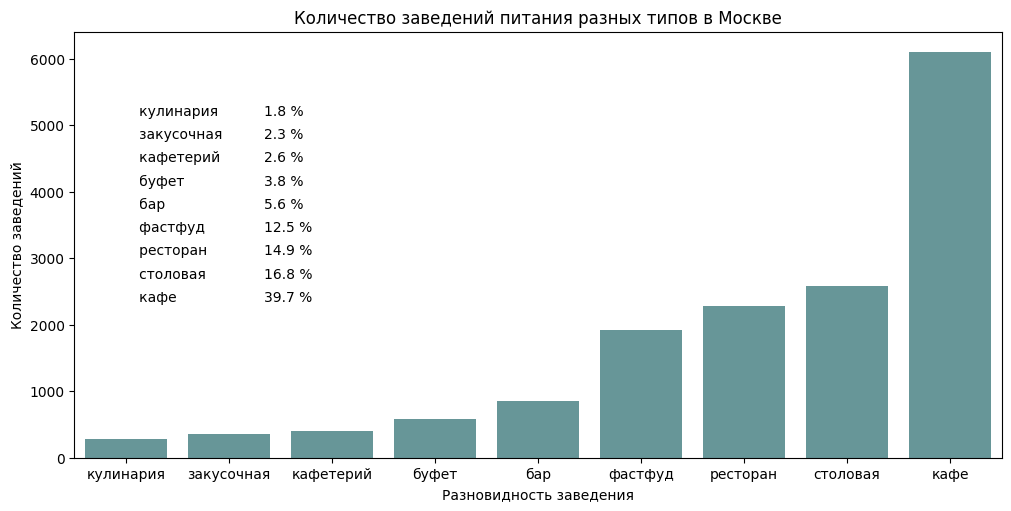

In [19]:
myfig, myax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.countplot(x='type', data=rest_df, color='cadetblue', order=types_list_by_rests, ax=myax)

myax.set_ylabel('Количество заведений')  
myax.set_xlabel('Разновидность заведения')  
myax.set_title("Количество заведений питания разных типов в Москве") 
#myax.grid()

share = list( round(100* types_list_df.sort_values('nof_rests').nof_rests / types_list_df.nof_rests.sum(),1) )
for i in range(rest_df['type'].nunique()):
    myax.annotate('   '+types_list_by_rests[i], xy=(0, 5150-i*350), xytext=(0, 5150-i*350))
    myax.annotate('        '+str(share[i])+' %', xy=(1, 5150-i*350), xytext=(1, 5150-i*350))

plt.show()

### Соотношение сетевых и несетевых заведений по количеству

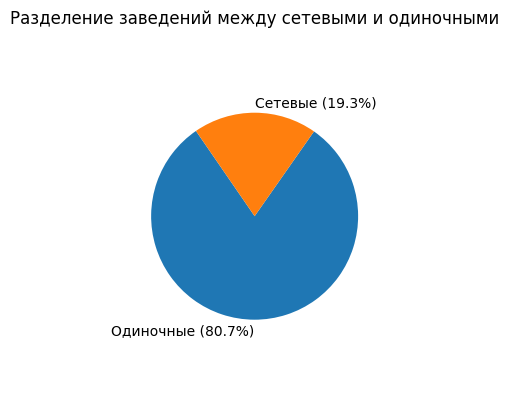

In [20]:
presentation_df = rest_df.groupby('is_chain', as_index=False).agg({'id':'count'})
labels_dict =  {True:'Сетевые', False:'Одиночные'}
presentation_df['label'] = presentation_df['is_chain'].apply(lambda s: labels_dict[s])
presentation_df['share'] = round( 100*presentation_df['id'] / presentation_df['id'].sum(),1)
presentation_df['share'] = presentation_df['share'].apply(lambda n: ' ('+str(n)+'%)' )
presentation_df['label'] = presentation_df['label'] + presentation_df['share']

plt.pie( list(presentation_df['id']), labels=list(presentation_df['label']), 
        counterclock=False, startangle=55, radius=0.7 )
plt.title("Разделение заведений между сетевыми и одиночными")
plt.show()

**В презентации** наложим круговую диаграмму на свободное место графика выше - поместив их на один слайд.

### Лидеры по сетевому бизнесу среди различных видов объекта общественного питания

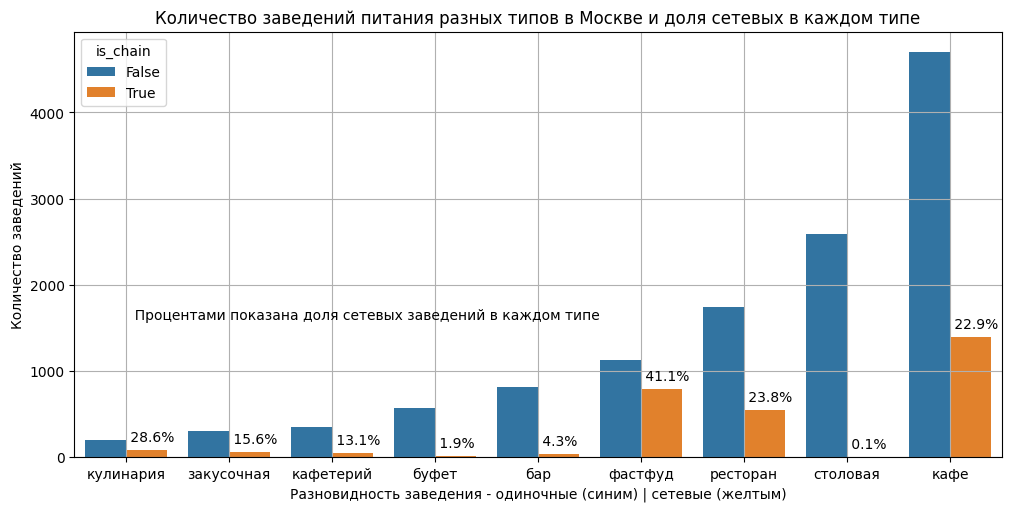

In [21]:
myfig, myax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.countplot(x='type', data=rest_df, hue='is_chain', order=types_list_by_rests, ax=myax)

myax.set_ylabel('Количество заведений')  
myax.set_xlabel('Разновидность заведения - одиночные (синим) | сетевые (желтым)')  
myax.set_title("Количество заведений питания разных типов в Москве и доля сетевых в каждом типе") 
myax.grid()

annotation = list(round(100*(types_list_df.sort_values('nof_rests').chained_share),1))
height = list(
    (types_list_df.sort_values('nof_rests').chained_share * types_list_df.sort_values('nof_rests').nof_rests).astype('int') )
for i in range(rest_df['type'].nunique()):
    myax.annotate(' '+str(annotation[i])+'%', xy=(i,height[i]+100), xytext=(i,height[i]+100))
myax.annotate('  Процентами показана доля сетевых заведений в каждом типе', xy=(0,1500+100), xytext=(0,1500+100))
    
plt.show()

#### Выводы:
По доле сетевых заведений ожидаемо лидируют фастфуды, а вот на втором месте, как ни странно, кулинарии - рестораны и кафе только на третьем:
1. Фастфуд          - 41%
2. Кулинарии        - 29%
3. Рестораны и Кафе - 23%

Остальные заведения существенно ниже по проценту сетевых, чем средний уровень (19.3%).  Хотя для ряда типов сетевой характер совсем не присущь (например, для столовых - 0.1%), но доля сетевых, все же присутствует во всех типах заведений.  Три лидера снизу:
1. Столовые - 0.1%
2. Буфеты - 1.9%
3. Бары - 4.3%

### Баланс между числом посадочных мест и количеством заведений в одной сети

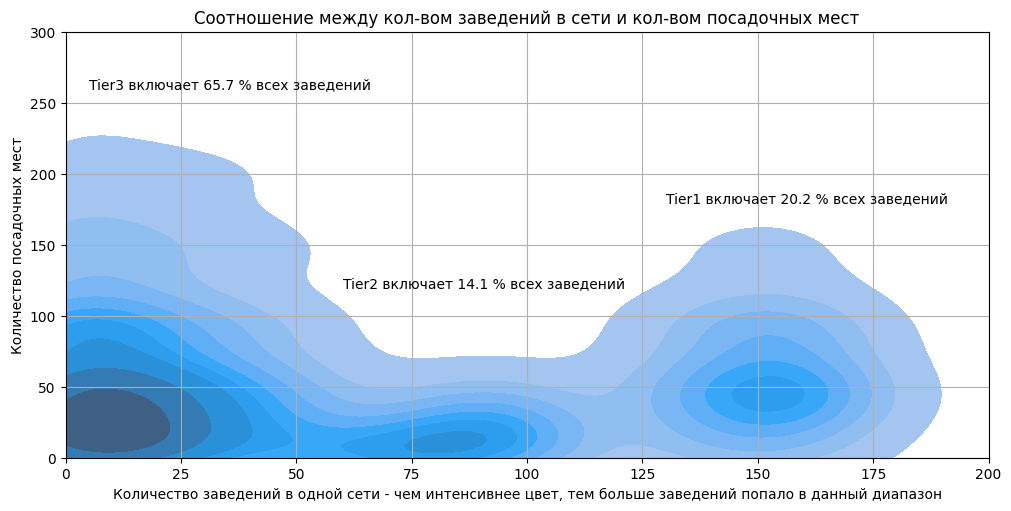

In [22]:
myfig, myax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.kdeplot(data=rest_df.query('is_chain'), x='name_count', y='nof_seats', fill=True, ax=myax ) 

myax.set_ylim(0,300)
myax.set_xlim(0,200)
myax.set_ylabel('Количество посадочных мест')  
myax.set_xlabel('Количество заведений в одной сети - чем интенсивнее цвет, тем больше заведений попало в данный диапазон')  
myax.set_title("Соотношение между кол-вом заведений в сети и кол-вом посадочных мест") 
myax.grid()

tier3 = str( round(100* len(rest_df.query('is_chain & name_count < 55')) / len(rest_df.query('is_chain')), 1) )
tier2 = str( round(100* len(rest_df.query('is_chain & name_count >= 55 & name_count < 120')) /len(rest_df.query('is_chain')),1))
tier1 = str( round(100* len(rest_df.query('is_chain & name_count >= 120')) / len(rest_df.query('is_chain')), 1) )

myax.annotate('Tier1 включает '+tier1+' % всех заведений', xy=(130,180), xytext=(130,180))
myax.annotate('Tier2 включает '+tier2+' % всех заведений', xy=(60,120), xytext=(60,120))
myax.annotate('Tier3 включает '+tier3+' % всех заведений', xy=(5,260), xytext=(5,260))

plt.show()


#### Выводы:
Мы видим три тренда у сетевых заведений, которые назовем tier1, tier2 и tier3:
* tier1 - условный центр в районе (155,45): крупные сети по полторы сотни заведений с количеством посадочных мест порядка 50;
* tier2 - условный центр в районе (85,12): средние сети в двое мельче крупных с количеством посадочных мест порядка 10-20;
* tier3 - условный центр в районе (15,25): мелкие сети с кол-вом заведений менее 20 с количеством посадочных мест порядка 10-20.

Для оценки долей заведений в tier-ах проведем визуальное разграничение по оси X: `tier3 < 55 <= tier2 < 120 <= tier1`.

Тренд "что лучше: много мелких или поменьше, но крупных" прослеживается только в группе Tier3 - например, в квадрате (25-50,50-100). В двух других группах происходит центрирования возле локальных оптимумов размеров групп и заведений.

### Количество посадочных мест для каждого вида объекта общественного питания

#### Средние количества посадочных мест по разным типам заведений

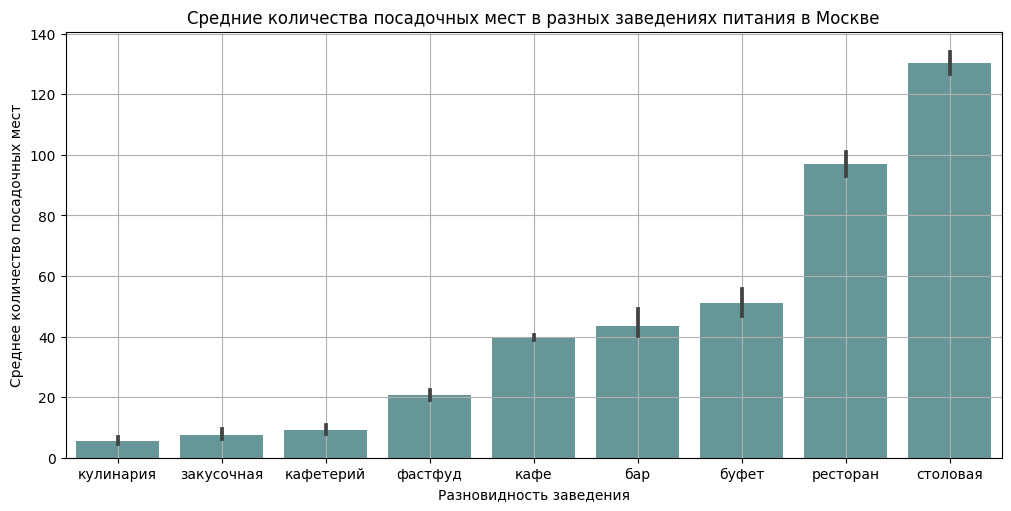

In [23]:
myfig, myax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.barplot(x='type', y='nof_seats', data=rest_df, color='cadetblue', order=types_list_by_seats, ax=myax)

myax.set_ylabel('Среднее количество посадочных мест')  
myax.set_xlabel('Разновидность заведения')  
myax.set_title("Средние количества посадочных мест в разных заведениях питания в Москве") 
myax.grid()

plt.show()

#### Распределения заведений каждого типа по количеству посадочных мест

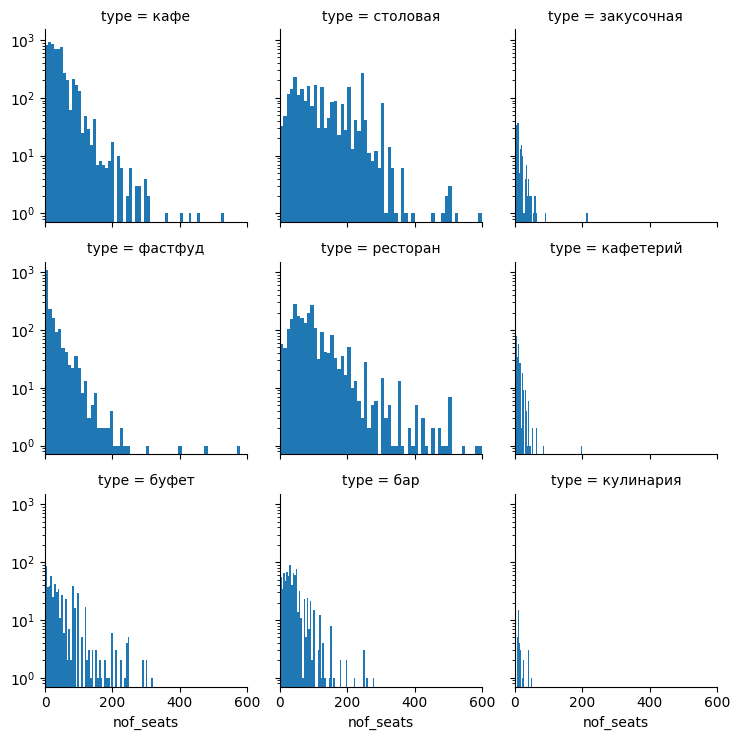

In [24]:
grid = sns.FacetGrid(rest_df.query('nof_seats <= 600'), col="type", col_wrap=3, height=2.5, xlim=(0,600))

grid.map(plt.hist, 'nof_seats', bins=60, log=True)

plt.show()

In [25]:
# для лучшего понимания распределения в самых больших сегментах:

print('Столовые - перцентили',25,49,75,96,':', 
      np.percentile(rest_df.query('type=="столовая"').nof_seats, [25,49,75,96]))
print()
print('Кафе - перцентили',4500_00/6000,5700_00/6000, round(5916_00/6000,2), round(5950_00/6000,2),':', 
      np.percentile(rest_df.query('type=="кафе"').nof_seats, [4500_00/6000,5700_00/6000,5916_00/6000, 5950_00/6000]))

Столовые - перцентили 25 49 75 96 : [ 50. 100. 200. 300.]

Кафе - перцентили 75.0 95.0 98.6 99.17 : [ 50. 100. 160. 200.]


#### Выводы:
1. более всего посадочных мест в столовых - 130 +/- 5 мест в среднем,
 * причем нет совсем маленьких столовых: в диапазоне до 50 мест находится четверть заведений и почти столько же в диапазоне 50-100 мест (для сравнения ниже совсем иной характер распределения для кафе).
2. не сильно от них отстают рестораны - 96 +/- 5 мест в среднем,
3. на третьем месте кафе, бары и буфеты - 40-55 мест, 
 * причем в кафе разброс мал: почти всегда 40 +/- 1 место. Видимо, это эффект квантования мест в маленьких кафе: в кафе все места за столиками, поэтому шаг изменения кол-ва мест в основном 4 (10%), а в барах и буфетах есть одиночные места за стойкой, стоячие вдоль стены и пр. поэтому такая разница в дисперсии кол-ва мест.  Кафе также сильно отличается от баров и буфетов картиной распределения: помимо огромного кол-ва маленьких кафе, есть сегмент средних и крупных: график распределения (логарифмический!) показывает, что кафе распределены примерно так:
 * 4500 мелких (до 50 мест),
 * 1200 средних (от 50 до 100 мест),
 * 250 крупных (от 100 до 200 мест),
 * оставшиеся менее 1% очень крупных (более 200 мест).
4. фастфуды только на 4-ом месте, видимо, за счет сильного доминирования мелких заведений-киосков с парой-другой столиков,
5. в остальных заведениях (кулинарии, закусочные и кафетерии) в среднем не более дюжины мест.

### Получение информации об улице из столбца `address` 

#### Анализ особенностей поля `address`
Для создания алгоритма получения названия улицы из строки адреса нам понадобятся следующие наблюдения:
1. Строка использует запятую как разделитель между параметрами адреса.
2. Строка-параметр содержит название переметра ("город", "улица", "дом", "корпус" и т.д.) и значения параметра ("Москва", "Егора Абакумова", "2/1","1").
3. Разделитель строки-параметра пробел, также может быть частью значения ("улица Егора Абакумова").
4. Названия и значение параметра могут следовать в произвольном порядке.
5. Записей много и помимо "города" и "улицы" могут быть "поселки" и "проспекты".
6. Также вместо "дом 2/1" можно ожидать встретить "дом 2, корпус 1"

Попробуем проанализировать

In [26]:
rest_df['is_street'] = rest_df['address'].apply(lambda s: 'улица' in s)

print( 'Слова "улица" нет в', len(rest_df) - rest_df['is_street'].sum(), 'записях из', len(rest_df) )

Слова "улица" нет в 6278 записях из 15366


In [27]:
rest_df['nof_addr_fields'] = rest_df['address'].apply(lambda s: len(s.split(',')))

rest_df['nof_addr_fields'].value_counts(dropna=False)

3    8187
4    6695
5     346
6     117
2      20
7       1
Name: nof_addr_fields, dtype: int64

In [28]:
# интересно, что за адреса с 2 параметрами только:
list(rest_df.query('nof_addr_fields == 2').address)  # ага, это все Москва!

['Партизанская улица, дом 30',
 'Партизанская улица, дом 30',
 '1-й Нагатинский проезд, дом 10',
 'проезд Добролюбова, дом 2',
 'Ленинский проспект, владение 164',
 'Новоданиловская набережная, дом 6',
 '5-й Котельнический переулок, дом 11',
 'улица Знаменка, дом 14',
 'Полевая улица, дом 20',
 'Чертановская улица, владение 32Б',
 'Варшавское шоссе, владение 99А',
 'улица Миклухо-Маклая, дом 18',
 'улица Ленинская Слобода, дом 26',
 'Медынская улица, дом 11А',
 'Суворовская площадь, дом 2',
 'Киевская улица, дом 7',
 'Алтуфьевское шоссе, дом 52А',
 'улица Льва Толстого, дом 18',
 'улица Льва Толстого, дом 18',
 'улица Льва Толстого, дом 18']

Сложная ситуация - нет возможности угадать какие варианты полей и аналогов *улицы* использованы.  Датафрейм слишком большой для визуального анализа.  Попробуем такую идею: названия параметров должны быть самыми часто встречающимися словами во всей совокупности строк адреса.  Составим список всех слов и посмотрим наиболее часто встречающиеся. 

Если список окажется слишком большим, для уменьшения объема вычислений можно выбросить из анализа сразу:
* все записи где было слово улица,
* из оставшихся все строки-параметры, где есть "город", "дом", "корпус".

Однако сперва попробуем весь датафрейм - есть шанс, что улицы будут совпадать в Москве и в малых населенных пунктах, поэтому название улицы надо, строго говоря, вычленять в паре с населенным пунктом (если это не Москва)! 

In [29]:
param_list = []

for addr_param_list in list(rest_df.address.str.split(',')):
    for param in addr_param_list: param_list.append(param)

big_words_list = []

for phrase in param_list:
    small_words_list = phrase.split()
    for word in small_words_list: big_words_list.append(word)
        
len(big_words_list)

111419

не так и много! Можно обойтись без мер по уменьшению кол-ва вычислений.  Применим панду для дальнейшего анализа:

In [30]:
pd.Series(big_words_list).value_counts(dropna=False).head(10)

город       15698
Москва      15295
дом         14841
улица        9088
строение     4154
1            4051
корпус       2770
2            2005
проспект     1444
шоссе        1325
dtype: int64

In [31]:
# мешают часто встречающиеся номера - удалим их:

small_words_list = []
for word in big_words_list:
    if word.isalpha(): small_words_list.append(word)

pd.Series(small_words_list).value_counts(dropna=False).head(10)

город       15698
Москва      15295
дом         14841
улица        9088
строение     4154
корпус       2770
проспект     1444
шоссе        1325
проезд        792
бульвар       752
dtype: int64

Список названий параметров почти готов - мы его видим на экране, однако нет гарантий, что там ниже не будут совсем уж единичные типы параметров.  Обратим внимание еще на один момент - все названия параметров выше с маленькой буквы ("Вал" - это часть названия, а не тип улицы), так что если из списка `small_words_list` удалить все, что не строчным кейсом, то останется нужный нам список названий параметров: 

In [32]:
tiny_words_list = []
for word in small_words_list:
    if word.islower(): tiny_words_list.append(word)

pd.Series(tiny_words_list).value_counts(dropna=False) # выводим целиком

город            15698
дом              14841
улица             9088
строение          4154
корпус            2770
проспект          1444
шоссе             1325
проезд             792
бульвар            752
переулок           725
поселение          420
набережная         390
площадь            385
владение           309
километр           151
посёлок            125
деревня             83
домовладение        76
микрорайон          61
сооружение          56
аллея               44
территория          31
село                17
и                   16
квартал             16
тупик               15
лет                  9
линия                6
проектируемый        6
просек               4
вблизи               4
рабочий              3
имени                3
деревни              3
дачный               3
dtype: int64

не все параметры являются названиями параметров адреса - например, *линия* и *квартал* могут быть названиями параметрами адреса, а *и*, *вблизи*, *имени* - скорее являются частью значения параметра адреса. 

#### Список видов улиц `street_types_list`
поэтому составим вручную список, выбрав визуально из списка выше:

In [33]:
street_types_list = [
    'улица',
    'проспект',
    'шоссе',
    'проезд',
    'бульвар',
    'переулок',
    'набережная',
    'площадь',
    'микрорайон', # добавили при анализе адресов типа "микрорайон Северное Чертаново, дом 1A"
    'аллея',
    'квартал', # добавили при анализе адресов типа "2-й квартал Капотня, дом 1"
    'тупик',
    'линия'
]

проверим наш список на уникальность и наличие признака улицы во всех адресах:

In [34]:
def line_f_check_street(s):
    counter = 0
    for name in street_types_list:
        if name in s: counter += 1
    return counter

rest_df['nof_street_syn'] = rest_df['address'].apply(line_f_check_street)

rest_df['nof_street_syn'].value_counts(dropna=False)

1    15043
0      323
Name: nof_street_syn, dtype: int64

С уникальностью все отлично, но что за адреса буз улиц?

In [35]:
list(rest_df.query('nof_street_syn == 0').address.head(20)) # посмотрим, что за адреса без улиц

['город Москва, город Зеленоград, корпус 401',
 'город Москва, город Зеленоград, корпус 435',
 'город Москва, город Зеленоград, корпус 436',
 'город Москва, город Зеленоград, корпус 438',
 'город Москва, город Зеленоград, корпус 438',
 'город Москва, город Зеленоград, корпус 834А',
 'город Москва, город Зеленоград, корпус 1106',
 'город Москва, город Зеленоград, корпус 1449',
 'город Москва, город Зеленоград, корпус 1456',
 'город Москва, город Зеленоград, корпус 1456',
 'город Москва, город Зеленоград, корпус 1805',
 'город Москва, город Зеленоград, корпус 533',
 'город Москва, город Зеленоград, корпус 826',
 'город Москва, город Зеленоград, корпус 126',
 'город Москва, город Зеленоград, корпус 330',
 'город Москва, поселение Вороновское, село Вороново, дом 110',
 'город Москва, поселение Внуковское, деревня Ликова, дом 1А',
 'город Москва, поселение Десеновское, деревня Десна, дом 144УЧ',
 'город Москва, поселение Московский, деревня Говорово, дом 1Б/Н',
 'город Москва, поселение Мос

В самом деле есть адреса без улиц!  Открываем Яндекс Карты, ищем "Зеленоград, корпус 401" (без названия улицы) - находит ОК, там есть кафе "Это кафе".  На карте видно, что улицы в Зеленограде есть, а вот нумерация домов общая,  если точнее приглядется, то видно, что в каждом квартале нумерация домов начинается со своей сотни - то есть сотня означает квартал!  (Закрытый город был когда-то - там производили секретную электронику СССР - адреса рассчитаны на то, что шпион не найдет дорогу к цели и замерзнет зимой!)

Хуже то, что на выводе видно, что помимо собственно города Москвы у нас есть много вариантов с селами и деревнями.  Можно предположить, что среди "благополучных улиц" окажется много улиц Ленина в разных поселках.  Не хотелось бы при группировках замешать улицу Ленина в Москве и в подмосковных поселках!

** Вывод**: по-видимому, улица - не самое удачное обозначение для места, которое может рассматриваться для расположения ресторана. Введем более широкое понятие, чем просто улица - введем понятие расположения `location`:
* в Москве - это название улицы, исключая номер дома и все что детальнее,
* в Подмосковье - это название более мелкого населенного пункта(ов), включая улицу, если есть, исключая номер дома и все что детальнее,
* в Зеленограде - это Зеленоград + кол=во сотен в номере корпуса (соответствует кварталу Зеленограда, судя по карте)

Для исследования возможности исключения параметров от *дома* и далее определим, какие синонимы слова *дом* также используются:

In [36]:
house_types_list = [
    ' дом ',
    ' владение ',
    ' домовладение '
] # указываем с пробелами, чтобы не считать по три раза: "[дом]о[владение]"

def line_f_check_house(s):
    counter = 0
    for name in house_types_list:
        if name in s: counter += 1
    return counter

rest_df['nof_house_syn'] = rest_df['address'].apply(line_f_check_house)

rest_df['nof_house_syn'].value_counts(dropna=False)

1    15226
0      140
Name: nof_house_syn, dtype: int64

In [37]:
set(list(rest_df.query('nof_house_syn == 0').address.sort_values())) # смотрим уникальные адреса, а sort_values - для поиска

{'город Москва, город Зеленоград, Крюковская площадь, строение 7',
 'город Москва, город Зеленоград, корпус 1004А',
 'город Москва, город Зеленоград, корпус 1016',
 'город Москва, город Зеленоград, корпус 1017',
 'город Москва, город Зеленоград, корпус 1106',
 'город Москва, город Зеленоград, корпус 1106Е',
 'город Москва, город Зеленоград, корпус 1115',
 'город Москва, город Зеленоград, корпус 1122',
 'город Москва, город Зеленоград, корпус 1128',
 'город Москва, город Зеленоград, корпус 1130',
 'город Москва, город Зеленоград, корпус 1138',
 'город Москва, город Зеленоград, корпус 1140',
 'город Москва, город Зеленоград, корпус 118',
 'город Москва, город Зеленоград, корпус 1204',
 'город Москва, город Зеленоград, корпус 1214',
 'город Москва, город Зеленоград, корпус 1215',
 'город Москва, город Зеленоград, корпус 123',
 'город Москва, город Зеленоград, корпус 124, строение 1',
 'город Москва, город Зеленоград, корпус 126',
 'город Москва, город Зеленоград, корпус 1410',
 'город Мос

#### Алгоритм определения расположения ресторана `location` по его адресу `address`

Резюмируя анализ выше, алгоритм определения `location` таков:
1. Если первым параметром идет "город Москва" - отбрасываем его (префикс). **NB!**: у нас есть 20 записей, без указания города (Москвы) - поэтому делаем проверку!
2. Для тех, у кого в строке адреса есть либо *дом*, либо *владение* (при этом попадает и *домовладение*), - отбрасываем все до дома/владения включительно справа (суффикс).
3. Для остальных (Это будут Зеленоград и Северное Чертаново) - отбрасываем справа все, что детальнее сотен в номере корпуса.  **NB!**: у некоторых номеров корпусов справа стоит буквенная литера - ее нужно отбросить.
4. Исключения составляют только:
 * "город Зеленоград, Крюковская площадь" - ее так и оставляем, ведь это как раз улица!
 * "квартал Волжский Бульвар 113а" в Москве - ошибка заполнения: отсутствует слово дом в отдельном параметре с номером дома.  Можно внести исправление в датасет, но проще отбросить номер дома в этом исключительном случае, оставив "квартал Волжский Бульвар" 
 
Осталось написать код - и вот он:

In [38]:
def line_f_location(addr):
    params = addr.split(',')
    
    if params[0] == 'город Москва': drop_prefix = 1 # возвращать будем строку, объединенную из среза params
    else: drop_prefix = 0
    
    house = -1 # это значение указывает, что дом или владение не найдены в параметрах
    i=0
    while (house < 0) and (i in range(len(params))):
        if 'дом ' in params[i]: house = i # без пробела неверно срабатывает на "Талдом" в названии улицы
        if 'владение' in params[i]: house = i
        i += 1
    
    
    if house > 0: drop_suffix = house # возвращать будем строку, объединенную из среза params
    else: drop_suffix = len(params)
    
    if house < 0:
        if 'Крюковская площадь' in addr: drop_suffix = 4
        elif 'квартал Волжский Бульвар' in addr: return 'квартал Волжский Бульвар'
        else:
            q_number = params[2].split()[1]
            if q_number[-1].isalpha(): number = int(q_number[:-3])
            else: number = int(q_number[:-2])
            return (params[1]+', корпус '+str(number)+'XX').strip()
    
    return (','.join( params[drop_prefix : drop_suffix] ) ).strip()

rest_df['location'] = rest_df['address'].apply(line_f_location) # и-и, поехали!

In [39]:
set(list(rest_df.location)) # посмотрим результаты

{'2-я Напрудная улица',
 'город Щербинка, улица Мостотреста',
 'поселение "Мосрентген", МКАД, 44-й километр',
 'Стандартная улица',
 'улица Большая Ордынка',
 'Коломенский проезд',
 'Попутная улица',
 'Юрловский проезд',
 'город Зеленоград, корпус 20XX',
 'Верхняя Первомайская улица',
 'Большая Бутовская улица',
 'улица Расплетина',
 'улица Кулакова',
 '2-я улица Энтузиастов',
 'Восточная улица',
 'Ялтинская улица',
 'улица Литвина-Седого',
 'площадь Академика Курчатова',
 '2-й Смоленский переулок',
 'поселение Московский, деревня Саларьево',
 '3-я Тверская-Ямская улица',
 'улица Малая Лубянка',
 '3-й проезд Марьиной Рощи',
 'улица 26-ти Бакинских Комиссаров',
 'проезд Стратонавтов',
 'Петровский бульвар',
 'город Зеленоград, площадь Шокина',
 'Столярный переулок',
 '1-й Монетчиковский переулок',
 'Студенческая улица',
 'Спартаковский переулок',
 'Семёновский переулок',
 'Большая Тульская улица',
 'Уральская улица',
 'Панкратьевский переулок',
 'Канатчиковский проезд',
 'улица Генерала

Вот **теперь хорошо!**  Последние штрихи:
* удалим вспомогательные поля, которые добавили при анализе,
* все-таки заменим ё на е в поле `location`:

In [40]:
rest_df = rest_df.drop(columns=['is_street','nof_addr_fields','nof_street_syn','nof_house_syn']) # удалим поля анализа

rest_df['location'] = rest_df['location'].apply(lambda s: s.replace('ё','е'))

#### Модифицированный датафрейм `rest_df` готов к дальнейшему анализу

In [41]:
rest_df.info()
rest_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          15366 non-null  int64 
 1   name        15366 non-null  object
 2   is_chain    15366 non-null  bool  
 3   type        15366 non-null  object
 4   address     15366 non-null  object
 5   nof_seats   15366 non-null  int64 
 6   name_count  15366 non-null  int64 
 7   location    15366 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 855.5+ KB


,id,name,is_chain,type,address,nof_seats,name_count,location
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,1,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,1,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,1,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,2,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,1,Абрамцевская улица


### Топ-10 улиц по количеству объектов общественного питания

In [42]:
top10_streets = rest_df.groupby('location', as_index=False).agg({'id':'count'}).rename(
    columns={'id':'nof_rests'}).sort_values(by='nof_rests', ascending=False).reset_index(drop=True).head(10)
top10_streets

,location,nof_rests
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


посмотрим соответствующие районы Москвы на карте:

![Moscow map with top10 streets](map.png)
* Рисунок доступен также по ссылке: https://disk.yandex.ru/i/W6HVNDg1jXExaA

**Замечание**: улицы-лидеры разной протяженности, поэтому сравнивать по общему количеству заведений некорректно: чем длиннее улица, тем большую территорию она охватывает, соответственно, больше будет и заведений.

Измерим длины 10 лидеров (например Яндекс Навигатором) и сравним удельную плотность заведений на километр:

In [43]:
street_length = [8.1, 12.3, 6.0, 0.55, 14.5, 15.6, 8.6, 8.1, 12.2, 4.4]

top10_streets['street_length'] = pd.Series(street_length)

top10_streets['nof_rests_per_km'] = round(top10_streets['nof_rests'] / top10_streets['street_length']).astype('int')

top10_streets.sort_values(by='nof_rests_per_km', ascending=False)

,location,nof_rests,street_length,nof_rests_per_km
3,Пресненская набережная,167,0.55,304
2,Ленинградский проспект,173,6.00,29
0,проспект Мира,204,8.10,25
9,Кировоградская улица,110,4.40,25
1,Профсоюзная улица,183,12.30,15
6,проспект Вернадского,132,8.60,15
7,Кутузовский проспект,114,8.10,14
4,Варшавское шоссе,162,14.50,11
5,Ленинский проспект,148,15.60,9
8,Каширское шоссе,112,12.20,9


А по плотности заведений картина меняется:
* На первое место в нереальным отрывом выходит Пресненская набережная - в среднем по одному заведению на каждые 3 погонных метра!  Видимо, там много бизнес центров, торговых и развлекательных комплексов и крупных гостиниц - в таких зданиях располагаются десятки заведений питания на один дом.
* Протяженные шоссе, включая Ленинский проспект, опускаются в самый конец десятки лидеров.
* Неожиданно в пятерке лидеров оказывается короткая Кировоградская улица в Чертаново.  Видимо, из-за сложности выезда из Чертаново, местные жители предпочитают закупаться локально, а Кировоградская улица является местным торговым променадом и местом расположения бизнес-центров, сдающих офисы компаниям.

Завершим таблицу топ 10 списком районов Москвы, по которым проходят соответствующие улицы: 

#### Таблица топ 10 улиц

In [44]:
city_quarters = [
    ['Мещанский','Алексеевский','Ростокино'],
    ['Академический','Черемушки','Коньково','Теплый стан'],
    ['Беговой','Сокол'],
    ['Пресненский'],
    ['Нагорный','Чертаново'],
    ['Донской','Гагаринский','Обручевский'],
    ['Гагаринский','Проспект Вернадского','Тропарево-Никулино'],
    ['Дорогомилово','Фили-Давыдково','Можайский'],
    ['Нагатино-Садовники','Москворечье-Сабурово','Орехово-Борисово'],
    ['Чертаново']
]

top10_streets['city_quarters'] = pd.Series(city_quarters)

top10_streets.sort_values(by='nof_rests_per_km', ascending=False)

,location,nof_rests,street_length,nof_rests_per_km,city_quarters
3,Пресненская набережная,167,0.55,304,[Пресненский]
2,Ленинградский проспект,173,6.00,29,"[Беговой, Сокол]"
0,проспект Мира,204,8.10,25,"[Мещанский, Алексеевский, Ростокино]"
9,Кировоградская улица,110,4.40,25,[Чертаново]
1,Профсоюзная улица,183,12.30,15,"[Академический, Черемушки, Коньково, Теплый стан]"
6,проспект Вернадского,132,8.60,15,"[Гагаринский, Проспект Вернадского, Тропарево-..."
7,Кутузовский проспект,114,8.10,14,"[Дорогомилово, Фили-Давыдково, Можайский]"
4,Варшавское шоссе,162,14.50,11,"[Нагорный, Чертаново]"
5,Ленинский проспект,148,15.60,9,"[Донской, Гагаринский, Обручевский]"
8,Каширское шоссе,112,12.20,9,"[Нагатино-Садовники, Москворечье-Сабурово, Оре..."


### Улицы с одним объектом общественного питания

In [45]:
one_rest_streets = rest_df.groupby('location', as_index=False).agg({'id':'count','nof_seats':'sum'}).rename(
    columns={'id':'nof_rests'}).query('nof_rests == 1').sort_values(by='nof_seats').reset_index(drop=True)

print('Количество "улиц" с одним заведением питания равно', len(one_rest_streets), 'из', 
      len(set(list(rest_df['location']))), ' (', round(100*len(one_rest_streets)/len(set(list(rest_df['location']))),2), '%)')
print('Их распределение по количеству мест имеет следующую статистику:')
one_rest_streets['nof_seats'].describe().astype('int')

Количество "улиц" с одним заведением питания равно 628 из 2056  ( 30.54 %)
Их распределение по количеству мест имеет следующую статистику:


count    628
mean      77
std       72
min        0
25%       25
50%       50
75%      100
max      330
Name: nof_seats, dtype: int32

Посмотрим на типичные названия "улиц".  Типичным считается уровень медианы, поэтому сделаем срез улиц, где единственное заведение имеет 50 мест:

In [46]:
typical_one_rest_streets_list = list(one_rest_streets.query('nof_seats == 50').location)
typical_one_rest_streets_list

['улица Жуковского',
 'поселение Роговское, деревня Бунчиха',
 '1-й Лучевой просек',
 'Старомонетный переулок',
 '26-й километр Московской Кольцевой Автодороги',
 'Сретенский тупик',
 'Гвардейская улица',
 '1-й Зачатьевский переулок',
 'Кузьминская улица',
 'Соймоновский проезд',
 '1-й Басманный переулок',
 'улица Знаменские Садки',
 '2-я Гражданская улица',
 'Пулковская улица',
 '3-й Лучевой просек',
 'Институтский переулок',
 '6-й Лучевой просек',
 'Тарусская улица',
 '1-й проезд Марьиной Рощи',
 '34-й километр Московской Кольцевой Автодороги',
 'Синельниковская улица',
 'Хохловский переулок',
 'проезд Черепановых',
 'Тарханская улица',
 'Хлыновский тупик']

Посмотрим по карте район, где находятся соответствующие улицы:

In [47]:
city_quarter = [
    'Чистые пруды Бульварное кольцо',
    'заМКАДье 50км деревня',
    'Сокольники',
    'Замоскворечье',
    'МКАД',
    'Сретенка Садовое кольцо',
    'Можайский',
    'Пречистенка-Остоженка',
    'парк Кузьминки',
    'Пречистенка-Остоженка',
    'Басманный',
    'Северное Бутово',
    'Богородское',
    'Речной вокзал',
    'Сокольники',
    'Мещанский',
    'Сокольники',
    'Ясенево',
    'Марьина Роща',
    'МКАД',
    'Северное Бутово',
    'Покровский бульвар Бульварное кольцо',
    'Коптево',
    'Жулебино',
    'Тверской'
]


typical_one_rest_streets = pd.DataFrame([typical_one_rest_streets_list,city_quarter]).T
typical_one_rest_streets.columns = ['улица','район']
typical_one_rest_streets

,улица,район
0,улица Жуковского,Чистые пруды Бульварное кольцо
1,"поселение Роговское, деревня Бунчиха",заМКАДье 50км деревня
2,1-й Лучевой просек,Сокольники
3,Старомонетный переулок,Замоскворечье
4,26-й километр Московской Кольцевой Автодороги,МКАД
5,Сретенский тупик,Сретенка Садовое кольцо
6,Гвардейская улица,Можайский
7,1-й Зачатьевский переулок,Пречистенка-Остоженка
8,Кузьминская улица,парк Кузьминки
9,Соймоновский проезд,Пречистенка-Остоженка


#### Выводы:
Мы видим, что "причины" иметь только одно заведение на улицу самые разные:
* это и короткие тупики и переулки в центре москвы (Бульварное кольцо, Садовое кольцо), где просто нет места для двух заведений питания (еще ведь там парикмахерские, бутики, банки и пр.);
* это и протяженные шоссе, где нет смысла часто останавливаться (МКАД, заМКАДье);
* это и районы с дорогой недвижимостью и плотной застройкой (Пречистенка-Остоженка), где окупить стоимость аренды крайне сложно, да и стояночных мест нет;
* это и нецентральные парки (Сокольники и Кузьминки), где вообще мало строений на одну улицу.

В заключение посмотрим на гистограмму распределения заведений на одну улицу по числу мест:

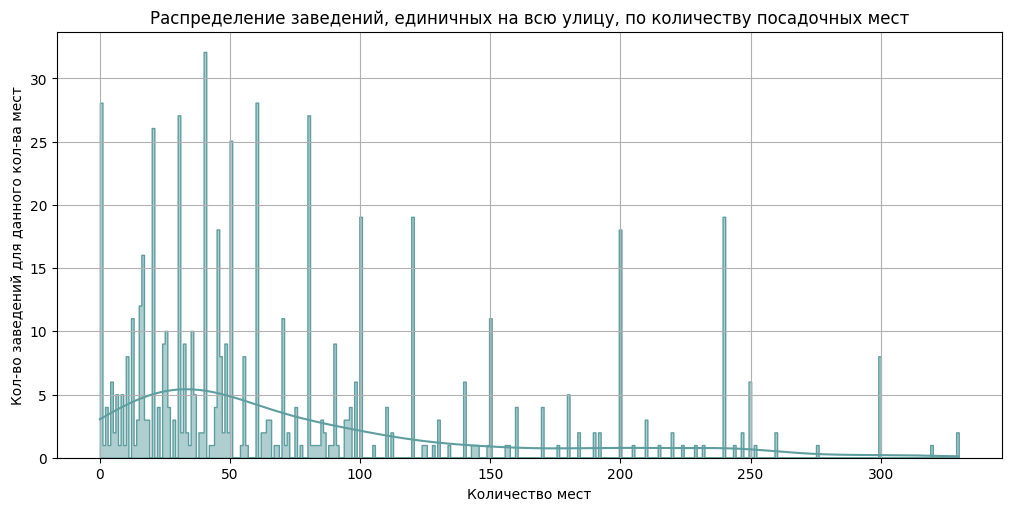

In [48]:
myfig, myax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.histplot(data=one_rest_streets, x='nof_seats', stat='frequency', bins=331, element='step', fill=True, kde=True, 
              color='cadetblue', log_scale=None, legend=True, ax=myax)

myax.set_ylabel('Кол-во заведений для данного кол-ва мест')  
myax.set_xlabel('Количество мест')  
myax.set_title("Распределение заведений, единичных на всю улицу, по количеству посадочных мест") 
myax.grid()

plt.show()

#### Выводы:
Используя полученную выше статистику, мы подобрали кол-во bins так, что по оси Y у нас в точности показано количество заведений с заданным количеством мест - см. для X=50 Y=25 (совпадает с длиной typical_one_rest_streets, который мы делали для nof_seats == 50).  На гистограмме мы видим на фоне низкого профиля регулярные пики через каждые 10 мест.  Видимо, это означает, что при указании мест специалисты по подготовке данных часто давали их округляя с точностью до десятка мест (за исключением диапазона 1-15, где такое округление неуместно, поэтому пика при X=10 нет).

Так что линия kde, предположительно, даже лучше соответствует реальной ситуации, чем точные значения количеств мест, указанные в датасете!

### Выводы и рекомендации 

#### Общий вывод
Поскольку исходные данные не содержат коммерческой информации, мы не можем советовать, исходя из оптимизации ROI или времен выхода на ROI = 1.  Поэтому мы применим другой подход:
1. Система заведений питания является сбалансированной по огромному количеству параметров экосистемой, на которую наложен временной естественный отбор.
2. Поэтому можно ожидать, что картина в распределении системы заведений питания по доступным в датасете параметрам соответствует результату естественного отбора - образованию жизнеспособной системы видов, которые успешны в сохранении и воспроизводстве во времени.  В нашем случае это означает, что усредненный объект в каждом сегменте нашел бизнес-успешную форму работы.
3. Однако мы не знаем и не можем получить из исходных данных формулу его успеха, поэтому наши рекомендации, фактически, гарантируют лишь существование успешного бизнес-решения для старта нового заведения питания в рекомендуемом нами диапазоне параметров, однако их нельзя рассматривать как гарантию успеха - сам путь к успеху еще предстоит найти предпринимателю, привлекающему инвестиции.
4. Таким образом, мы собираемся рекомендовать диапазон параметров, в котором, согласно статистике риск бизнеса минимален для большинства бизнесменов и инвесторов.

#### Рекомендации по типу заведения
Мы рекомендуем начать бизнес с открытия кафе.  Основания:
1. Судя по доминирующему количеству заведений данного типа (40% от всех заведений - см. главу 2.1), бизнес с кафе в среднем самый успешный.
2. Распределение кафе по размерам (кол-ву посадочных мест) подтверждает возможность постепенного роста бизнеса (см. выводы 2.5.3 ) - можно начать с небольших затрат, а потом расширяться по мере ROI.

#### Рекомендации по району расположения
Бизнес рекомендуем начинать в районе из списка (по убыванию привлекательности):
* Пресненский
* Сокол
* Беговой
* Мещанский
* Алексеевский
* Ростокино
* Чертаново
* Академический
* Черемушки
* Коньково
* Теплый стан
* Гагаринский
* Проспект Вернадского
* Тропарево-Никулино

Кафе в указанных районах лучше открывать на улице из списка (по убыванию привлекательности):
* Пресненская набережная
* Ленинградский проспект
* Проспект Мира
* Кировоградская улица
* Профсоюзная улица
* Проспект Вернадского

Особое внимание рекомендуем уделить району Пресненской набережной, так как судя по плотности заведений питания, данный район является Клондайком бизнеса на еде!

#### Рекомендации по количеству посадочных мест
Ключем к рекомендации по кол-ву посадочных мест является график главы 2.4.
Поскольку данный график является также основой плана по расширению сети кафе, мы включим данную рекомендацию в рекомендации первого шага следующей главы.

#### Рекомендации по возможности развития сети.
Как уже сказано выше, график главы 2.4 показывает оптимальный путь расширения сети кафе и ее стартовую точку (ответ на вопрос главы выше).  Однако в главе 2.4 график был плстроен для всех типов заведений, а мы уже рекомендовали начать с кафе.  Для уточнения рекомендации повторим график главы 2.4 - теперь только для кафе:

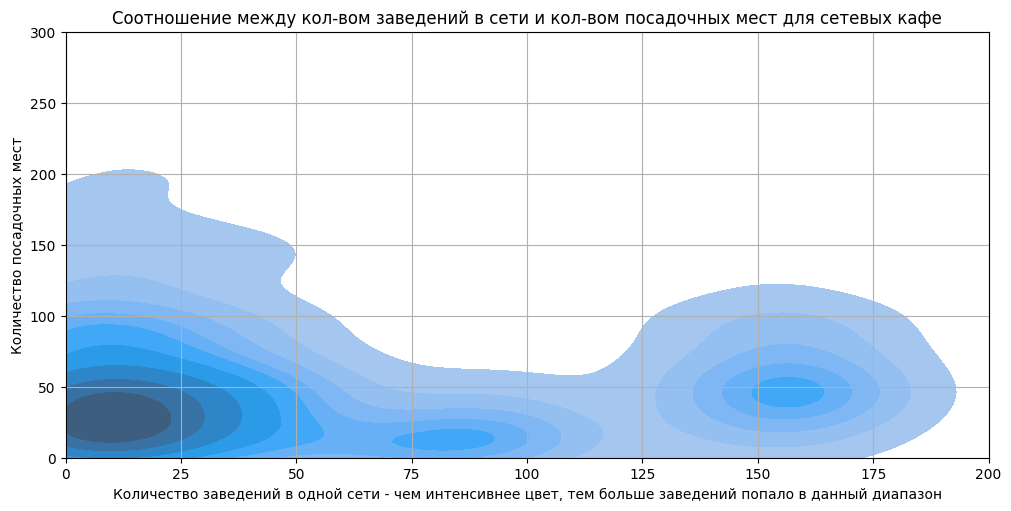

In [49]:
myfig, myax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.kdeplot(data=rest_df.query('is_chain & type == "кафе"'), x='name_count', y='nof_seats', fill=True, ax=myax ) 

myax.set_ylim(0,300)
myax.set_xlim(0,200)
myax.set_ylabel('Количество посадочных мест')  
myax.set_xlabel('Количество заведений в одной сети - чем интенсивнее цвет, тем больше заведений попало в данный диапазон')  
myax.set_title("Соотношение между кол-вом заведений в сети и кол-вом посадочных мест для сетевых кафе") 
myax.grid()

plt.show()

##### Принцип расширения сети
Идея в том, чтобы следовать постепенному наращиванию кол-ва кафе одной сети (1,2,3 и т.д.), следуя максимуму плотности на графике.  Поэтому нам не нужен весь график, но только его значения в стартовом диапазоне: кол-во заведений меньше 20, кол-во мест на одно заведение меньше 40.  Сделаем zoom на этом диапазоне и увеличим кол-во изобар :

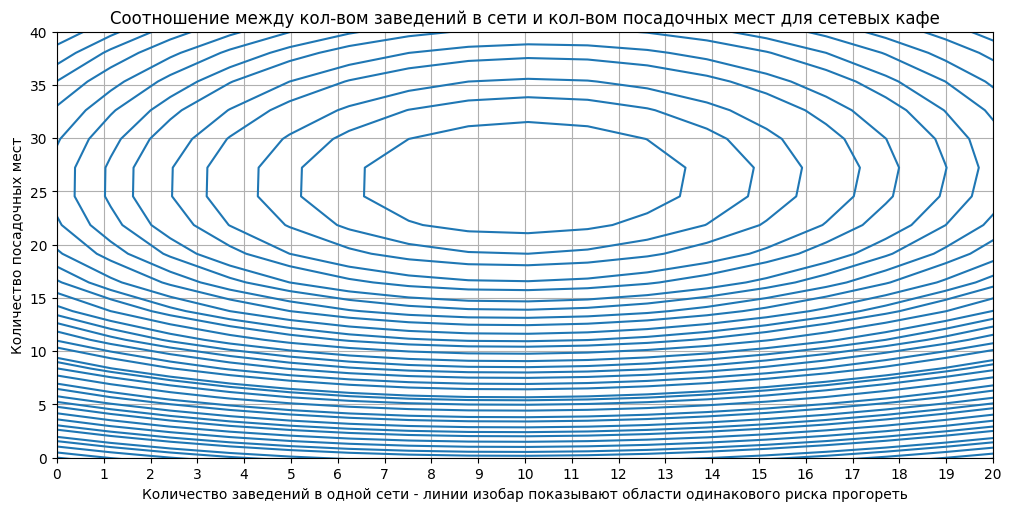

In [50]:
myfig, myax = plt.subplots(figsize=(10,5), constrained_layout=True)

sns.kdeplot(data=rest_df.query('is_chain & type == "кафе"'), x='name_count', y='nof_seats', fill=False, ax=myax, levels=100 ) 

myax.set_ylim(0,40)
myax.set_xlim(0,20)
myax.set_xticks([i for i in range(21)])
myax.set_ylabel('Количество посадочных мест')  
myax.set_xlabel('Количество заведений в одной сети - линии изобар показывают области одинакового риска прогореть')  
myax.set_title("Соотношение между кол-вом заведений в сети и кол-вом посадочных мест для сетевых кафе") 
myax.grid()

plt.show()

Оптимальными точками для каждого кол-ва заведений будут точки касания вертикальных прямых, соответствующих количеству заведений, линий изобар.  Причем, по мере приближения к области максимальной плотности бизнес риски будут снижаться, а по мере удаления - возрастать.  Линия изобары соответствует одинаковому уровню интегрального бизнес-риска.

##### Собственно рекомендации по расширению бизнеса 
Учитывая вышесказанное мы можем рекомендовать:
1. Для первого заведения следует выбрать 26 +/- 5 мест (**это ответ на вопрос прошлой главы**).
2. Далее не следует увеличивать кол-во мест одного заведения, но нужно добавлять новые заведения с кол-вом мест в том же диапазоне.
3. При этом, до 10 заведений есть благоприятный прогноз по снижению общего бизнес-риска при увеличении кол-ва заведений.
4. При увеличении кол-ва свыше 10, но не более 20, общий бизнес-риск будет увеличиваться, но не превысит бизнес-риск первого стартапа.
5. Мы не рекомендуем расширять одну сеть более чем на 20 заведений - меньший риск будет начать развивать вторую сеть после того, как первая достигнет 20 заведений.
6. По мере того, как сеть приближается к максимальному размеру (20), оптимальный диапазон кол-ва посадочных мест сдвигается к 27 +/- 5 мест.

## Шаг №3. Подготовка презентации для инвесторов

### Презентация в pdf
Презентация < https://disk.yandex.ru/i/aj_EHx6ivuImYw >

# < конец документа >

# Здесь находятся некоторые дополнительные построения исключительно для улучшения слайдов презентации

## Дополнительные картинки для слайдов

### для части 1 слайд 3

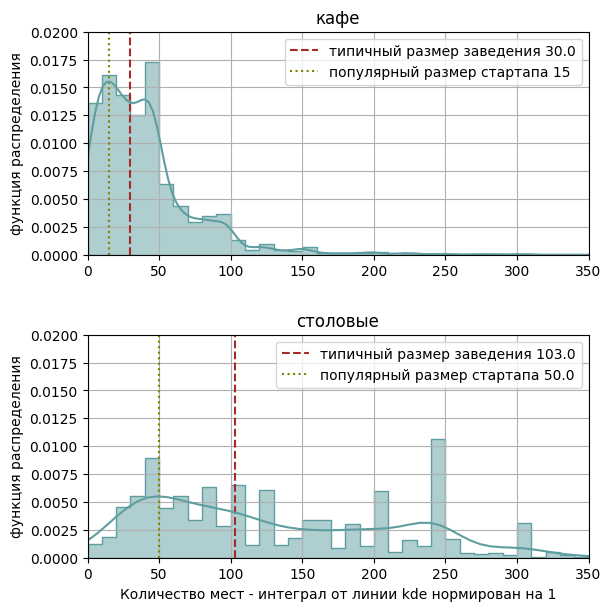

In [51]:
x_max = 350 # масштаб графиков по оси X
y_max = 0.02 # масштаб графиков по оси Y

myfig, myax = plt.subplots(2, 1, figsize=(6,6), constrained_layout=True)

sns.histplot(data=rest_df.query('type == "кафе"'), x='nof_seats', stat='density', bins=[10*i for i in range(x_max//10+1)], 
             element='step', fill=True, kde=True, color='cadetblue', log_scale=None, legend=True, ax=myax[0])

sns.histplot(data=rest_df.query('type == "столовая"'), x='nof_seats', stat='density', bins=[10*i for i in range(x_max//10+1)], 
             element='step', fill=True, kde=True, color='cadetblue', log_scale=None, legend=True, ax=myax[1])

myax[0].vlines(rest_df.query('type == "кафе"')['nof_seats'].median(), ymin=0, ymax=y_max, colors='brown', linestyles='--', 
               label='типичный размер заведения '+str(rest_df.query('type == "кафе"')['nof_seats'].median()))
myax[1].vlines(rest_df.query('type == "столовая"')['nof_seats'].median(), ymin=0, ymax=y_max, colors='brown', linestyles='--', 
               label='типичный размер заведения '+str(rest_df.query('type == "столовая"')['nof_seats'].median()))
myax[0].vlines(15, ymin=0, ymax=y_max, colors='olive', linestyles=':', label='популярный размер стартапа '+str(15))
myax[1].vlines(50, ymin=0, ymax=y_max, colors='olive', linestyles=':', label='популярный размер стартапа '+str(50.0))

myax[0].set_xlabel(' ')
myax[1].set_xlabel('Количество мест - интеграл от линии kde нормирован на 1')
myax[0].set_title("кафе") 
myax[1].set_title("столовые")

for i in [0,1]:
    myax[i].set_ylabel('функция распределения')  
    myax[i].set_xlim(0,x_max)
    myax[i].set_ylim(0,y_max)
    myax[i].grid()
    myax[i].legend()
    
plt.show()

In [52]:
print('If you see this line, then run-all-cells-command has been executed successfully!')

If you see this line, then run-all-cells-command has been executed successfully!
